In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tqdm import tqdm

# ignore information messgaes from tensorflow, but we will receieve error messages


**Loading Dataset**

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [3]:
type(X_train[0].shape)


tuple

**Changing Shape**

In [4]:
imgsize=200
catagoris=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
allimglist=list()

b=0
for j in range(50000):
    imgpath=X_train[j]
    img=imgpath
    img_resized=cv2.resize(img,(imgsize,imgsize))
    allimglist.append([img_resized,catagoris[b]])
    if b%10==0:
      b+=1

In [ ]:
X_train.shape

(50000, 32, 32, 3)

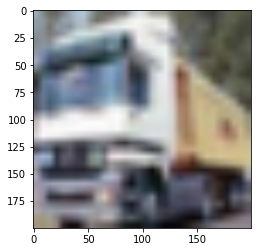

In [5]:
plt.imshow(allimglist[1][0])


**Checking the dataset**

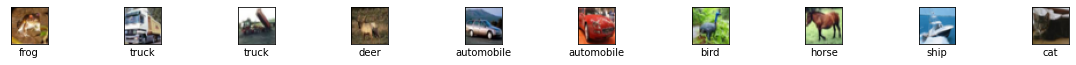

In [6]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(catagoris[Y_train[i][0]])
    
plt.show()

# **Implementing L1**

In [7]:
cat=allimglist[49][0]
#imgcat=cv2.imread(cat,cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
img_resizedcat=cv2.resize(gray,(imgsize,imgsize))



totalimg=list()
for i in range(len(allimglist)):
    a= cv2.cvtColor(allimglist[i][0], cv2.COLOR_BGR2GRAY)
    L1=img_resizedcat-a
    p=np.absolute(L1)
    catsum=np.sum(p)
    totalimg.append((catsum,i))
sortedlist=sorted(totalimg,key=lambda x:x[0])

**Testing L1**

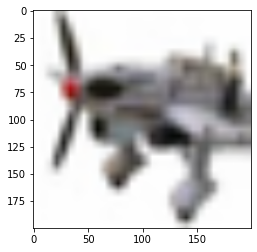

In [11]:
pic=sortedlist[0][1]
plt.imshow(allimglist[pic][0])

# **Implementing L2**

In [9]:
cat=allimglist[1][0]
#imgcat=cv2.imread(cat,cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
img_resizedcat2=cv2.resize(gray,(imgsize,imgsize))

totalimg=list()
for i in range(len(allimglist)):
    c= cv2.cvtColor(allimglist[i][0], cv2.COLOR_BGR2GRAY)
    L2=img_resizedcat2-c
    k=L2**2
    s=np.sum(k)
    m=np.sqrt(s)
    totalimg.append((m,i))
sortlist=sorted(totalimg,key=lambda x:x[0])


**Testing L2**

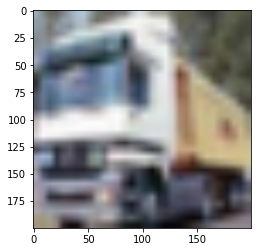

In [10]:
pic=sortlist[0][1]
plt.imshow(allimglist[pic][0])